In [ ]:
"""
plot differet design of LArTPC's stats
@aurthor Jiancheng Zeng
@Oct 26 2021
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd
import math
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [3]:
event = []
identical = []

"""
Select by name of the column
---------------------
"""
title = ["eventID", "trackID", "parentID", "particleID", "copyNb1 (mother volume)", "copyNb", "material", "time (ns)", "energy(MeV)", "energy deposit(MeV)", "parent process name", "process name", "px (MeV/c)", "py (MeV/c)", "pz (MeV/c)", "step length (cm)", "x (cm)", "y (cm)", "z (cm)"]

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
#data = pd.read_table("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210824_anti_proton_250MeV_Lin.dat")    #get data file
data = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/rawdata/Old_GRASP_anti_proton_5e6_MeV.dat"))
print("finish reading data!")

"""
modification
"""
TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index_pbar = []
angle_pbar = []
distance_pbar = []
Nevent = -1

print("Modifing data ...")
for i in range(len(data[:,0])-1):
#for i in range(27):
    Nevent = Nevent + 1
    if(data[i][0] != data[i+1][0]):
        for k in range(Nevent):
            if(str(data[i-Nevent+k][6]) == 'LAr' and str(data[i-Nevent+k][3]) == '-2212' and str(data[i][8]) == str(data[i][9])):
                event_in = 0
                event_out = 0
                tempin = 0
                tempout = 0
                tempin_T = 0
                for m in range(k):
                    if(str(data[i-Nevent+m][5]) == '-10000' or str(data[i-Nevent+m][5]) == '-10001' or str(data[i-Nevent+m][5]) == '-10002' or str(data[i-Nevent+m][5]) == '-10003' or str(data[i-Nevent+m][5]) == '-10005' or str(data[i-Nevent+m][5]) == '-10006' and str(data[i-Nevent+m][3]) == '-2212'):
                    #if(str(data[i-Nevent+m][5]) == '-11004' and str(data[i-Nevent+m][3]) == '-2212'):
                        tempout = tempout + float(data[i-Nevent+m][9])
                        if(str(data[i-Nevent+m-1][5]) != '-10000' and str(data[i-Nevent+m-1][5]) != '-10001' and str(data[i-Nevent+m-1][5]) != '-10002' and str(data[i-Nevent+m-1][5]) != '-10003' and str(data[i-Nevent+m-1][5]) != '-10005' and str(data[i-Nevent+m-1][5]) != '-10006' or str(data[i-Nevent+m][5]) == '-10000' or str(data[i-Nevent+m][5]) == '-10001' or str(data[i-Nevent+m][5]) == '-10002' or str(data[i-Nevent+m][5]) == '-10003' or str(data[i-Nevent+m][5]) == '-10005' or str(data[i-Nevent+m][5]) == '-10006' and data[i-Nevent+m][6] == 'Plastic'):
                            tempout_T = data[i-Nevent+m][7]
                            event_out = m
                    #elif(str(data[i-Nevent+m][5]) == '-10000' or str(data[i-Nevent+m][5]) == '-10005' and str(data[i-Nevent+m][3]) == '-2212'):
                    if(str(data[i-Nevent+m][5]) == '-11000' or str(data[i-Nevent+m][5]) == '-11001' or str(data[i-Nevent+m][5]) == '-11002' or str(data[i-Nevent+m][5]) == '-11003' or str(data[i-Nevent+m][5]) == '-11005' or str(data[i-Nevent+m][5]) == '-11006' and str(data[i-Nevent+m][3]) == '-2212'):
                        tempin = tempin + float(data[i-Nevent+m][9])
                        if(str(data[i-Nevent+m-1][5]) != '-11000' and str(data[i-Nevent+m-1][5]) != '-11001' and str(data[i-Nevent+m-1][5]) != '-11002' and str(data[i-Nevent+m-1][5]) != '-11003' and str(data[i-Nevent+m-1][5]) != '-11005' and str(data[i-Nevent+m-1][5]) != '-11006' and data[i-Nevent+m][6] == 'Plastic'):
                            tempin_T = data[i-Nevent+m][7]
                            event_in = m
                if(tempin != 0 and tempout != 0):
                    #theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-0) ** 2))
                    theta = np.arctan(np.sqrt((float(data[i-Nevent+event_out][17])-float(data[i-Nevent+event_in][17])) ** 2 + (float(data[i-Nevent+event_out][16])-float(data[i-Nevent+event_in][16])) ** 2)/(float(data[i-Nevent+event_out][18])-float(data[i-Nevent+event_in][18])))
                    distance = np.sqrt((float(data[i-Nevent+event_out][16]) - float(data[i-Nevent+event_in][16])) ** 2 + (float(data[i-Nevent+event_out][17]) - float(data[i-Nevent+event_in][17])) ** 2 + (float(data[i-Nevent+event_out][18]) - float(data[i-Nevent+event_in][18])) ** 2)
                    TOF_out_pbar_E.append(tempout)
                    TOF_in_pbar_E.append(tempin)
                    index_pbar.append(data[i-Nevent+k][0])
                    TOF_out_pbar_T.append(tempout_T)
                    TOF_in_pbar_T.append(tempin_T)
                    angle_pbar.append(theta)
                    distance_pbar.append(distance)
                Nevent = -1
                break       
    print("TOF data process:"+str(int(100*i/len(data[:,0])))+"%", end='\r')

print("\n identification:finished!")

index_pbar = array([float(i) for i in index_pbar])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
angle_pbar = array([float(i) for i in angle_pbar])
#plt.scatter(time_pbar, dE_pbar)
anti_p = np.array([index_pbar, dEOut_pbar, dEIn_pbar, time_pbar, angle_pbar, distance_pbar]).transpose()
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/GRAMS/data/TOF/Old_GRASP_anti_proton_5e6_MeV.txt", "w") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_p)
print("finished!")



Reading data ...
finish reading data!
Modifing data ...
TOF data process:99%
 identification:finished!
finished!


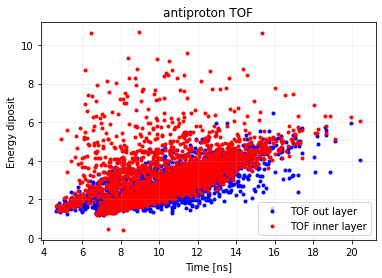

In [11]:
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar, marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

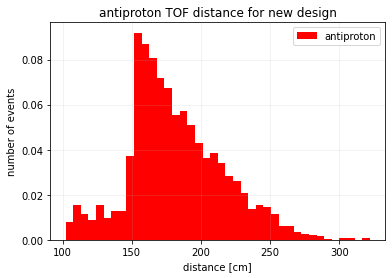

In [5]:
anti_proton_Y = np.array(distance_pbar)
plt.hist(anti_proton_Y, bins = 40, weights=np.ones(len(anti_proton_Y)) / len(anti_proton_Y), label = "antiproton", color = 'r')
plt.title('antiproton TOF distance for old design')
plt.xlabel('distance [cm]')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

In [6]:
event = []
identical = []

"""
Select by name of the column
---------------------
"""
title = ["eventID", "trackID", "parentID", "particleID", "copyNb1 (mother volume)", "copyNb", "material", "time (ns)", "energy(MeV)", "energy deposit(MeV)", "parent process name", "process name", "px (MeV/c)", "py (MeV/c)", "pz (MeV/c)", "step length (cm)", "x (cm)", "y (cm)", "z (cm)"]

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
#data = pd.read_table("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210824_anti_proton_250MeV_Lin.dat")    #get data file
data = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/rawdata/Old_GRASP_anti_proton_5e6_MeV.dat"))
print("finish reading data!")

"""
modification
"""
TOF_out_pbar_AIF_E = []
TOF_out_pbar_AIF_T = []
TOF_in_pbar_AIF_E = []
TOF_in_pbar_AIF_T = []
index_pbar_AIF = []
angle_pbar_AIF = []
distance_pbar_AIF = []
Nevent = -1

print("Modifing data ...")
for i in range(len(data[:,0])-1):
#for i in range(27):
    Nevent = Nevent + 1
    if(data[i][0] != data[i+1][0]):
        for k in range(Nevent):
            if(str(data[i-Nevent+k][6]) == 'LAr' and str(data[i-Nevent+k][3]) == '-2212' and str(data[i][8]) == str(data[i][9])):
                event_in = 0
                event_out = 0
                tempin = 0
                tempout = 0
                tempin_T = 0
                for m in range(k):
                    if(str(data[i-Nevent+m][5]) == '-10000' or str(data[i-Nevent+m][5]) == '-10001' or str(data[i-Nevent+m][5]) == '-10002' or str(data[i-Nevent+m][5]) == '-10003' or str(data[i-Nevent+m][5]) == '-10005' or str(data[i-Nevent+m][5]) == '-10006' and str(data[i-Nevent+m][3]) == '-2212'):
                    #if(str(data[i-Nevent+m][5]) == '-11004' and str(data[i-Nevent+m][3]) == '-2212'):
                        tempout = tempout + float(data[i-Nevent+m][9])
                        if(str(data[i-Nevent+m-1][5]) != '-10000' and str(data[i-Nevent+m-1][5]) != '-10001' and str(data[i-Nevent+m-1][5]) != '-10002' and str(data[i-Nevent+m-1][5]) != '-10003' and str(data[i-Nevent+m-1][5]) != '-10005' and str(data[i-Nevent+m-1][5]) != '-10006' or str(data[i-Nevent+m][5]) == '-10000' or str(data[i-Nevent+m][5]) == '-10001' or str(data[i-Nevent+m][5]) == '-10002' or str(data[i-Nevent+m][5]) == '-10003' or str(data[i-Nevent+m][5]) == '-10005' or str(data[i-Nevent+m][5]) == '-10006' and data[i-Nevent+m][6] == 'Plastic'):
                            tempout_T = data[i-Nevent+m][7]
                            event_out = m
                    #elif(str(data[i-Nevent+m][5]) == '-10000' or str(data[i-Nevent+m][5]) == '-10005' and str(data[i-Nevent+m][3]) == '-2212'):
                    if(str(data[i-Nevent+m][5]) == '-11000' or str(data[i-Nevent+m][5]) == '-11001' or str(data[i-Nevent+m][5]) == '-11002' or str(data[i-Nevent+m][5]) == '-11003' or str(data[i-Nevent+m][5]) == '-11005' or str(data[i-Nevent+m][5]) == '-11006' and str(data[i-Nevent+m][3]) == '-2212'):
                        tempin = tempin + float(data[i-Nevent+m][9])
                        if(str(data[i-Nevent+m-1][5]) != '-11000' and str(data[i-Nevent+m-1][5]) != '-11001' and str(data[i-Nevent+m-1][5]) != '-11002' and str(data[i-Nevent+m-1][5]) != '-11003' and str(data[i-Nevent+m-1][5]) != '-11005' and str(data[i-Nevent+m-1][5]) != '-11006' and data[i-Nevent+m][6] == 'Plastic'):
                            tempin_T = data[i-Nevent+m][7]
                            event_in = m
                if(tempin != 0 and tempout != 0):
                    #theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-0) ** 2))
                    theta = np.arctan(np.sqrt((float(data[i-Nevent+event_out][17])-float(data[i-Nevent+event_in][17])) ** 2 + (float(data[i-Nevent+event_out][16])-float(data[i-Nevent+event_in][16])) ** 2)/(float(data[i-Nevent+event_out][18])-float(data[i-Nevent+event_in][18])))
                    distance = np.sqrt((float(data[i-Nevent+event_out][16]) - float(data[i-Nevent+event_in][16])) ** 2 + (float(data[i-Nevent+event_out][17]) - float(data[i-Nevent+event_in][17])) ** 2 + (float(data[i-Nevent+event_out][18]) - float(data[i-Nevent+event_in][18])) ** 2)
                    TOF_out_pbar_AIF_E.append(tempout)
                    TOF_in_pbar_AIF_E.append(tempin)
                    index_pbar_AIF.append(data[i-Nevent+k][0])
                    TOF_out_pbar_AIF_T.append(tempout_T)
                    TOF_in_pbar_AIF_T.append(tempin_T)
                    angle_pbar_AIF.append(theta)
                    distance_pbar_AIF.append(distance)
                Nevent = -1
                break       
    print("TOF data process:"+str(int(100*i/len(data[:,0])))+"%", end='\r')

print("\n identification:finished!")

index_pbar_AIF = array([float(i) for i in index_pbar_AIF])
time_pbar_AIF = array([float(i) for i in TOF_in_pbar_AIF_T]) - array([float(i) for i in TOF_out_pbar_AIF_T])
dEOut_pbar_AIF = array([float(i) for i in TOF_out_pbar_AIF_E])
dEIn_pbar_AIF = array([float(i) for i in TOF_in_pbar_AIF_E])
angle_pbar_AIF = array([float(i) for i in angle_pbar_AIF])
#plt.scatter(time_pbar_AIF, dE_pbar_AIF)
anti_p = np.array([index_pbar_AIF, dEOut_pbar_AIF, dEIn_pbar_AIF, time_pbar_AIF, angle_pbar_AIF, distance_pbar_AIF]).transpose()
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/GRAMS/data/TOF/GRASP_anti_proton_5e6_MeV_STOP.txt", "w") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_p)
print("finished!")



Reading data ...
finish reading data!
Modifing data ...
TOF data process:99%
 identification:finished!
finished!


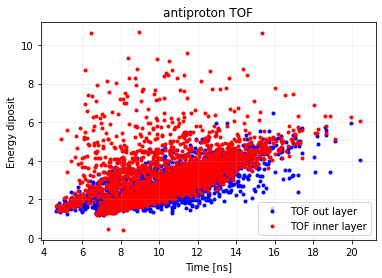

In [10]:
plt.scatter(time_pbar_AIF, dEOut_pbar_AIF, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar_AIF, dEIn_pbar_AIF, marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

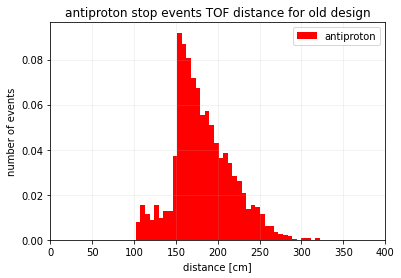

In [12]:
anti_proton_Y_AIF = np.array(distance_pbar_AIF)
plt.hist(anti_proton_Y_AIF, bins = 40, weights=np.ones(len(anti_proton_Y_AIF)) / len(anti_proton_Y_AIF), label = "antiproton", color = 'r')
plt.title('antiproton stop events TOF distance for old design')
plt.xlabel('distance [cm]')
plt.ylabel('number of events')
plt.legend(loc='best')
plt.xlim(0, 400)
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)